In [1]:
import os
import pandas as pd
from pathlib import Path

# Root directory
root_path = Path("/Users/shrutishah/Downloads/RoyBen-ShalomLab/shruti_axontracking_analysis_detailedcsvs")

# This will store all the data
data_dict = {}

# Walk through each subfolder
for run_folder in root_path.iterdir():
    if run_folder.is_dir():
        # Extract run number from folder name (after last "_")
        run_number = run_folder.name.split("_")[-1]
        
        # Path to csv folder
        csv_folder = run_folder / "csv"
        if csv_folder.exists():
            run_data = {}
            for file in csv_folder.glob("*.csv"):
                # Remove ".csv" from filename to use as key
                key_name = file.stem  # e.g., branch_metrics, axon_summary_metrics
                try:
                    run_data[key_name] = pd.read_csv(file)
                except Exception as e:
                    print(f"Error reading {file.name} in run {run_number}: {e}")
            data_dict[run_number] = run_data


In [12]:
def search_column_across_runs(data_dict, column_name):
    results = []
    for run_num, file_dict in data_dict.items():
        for file_name, df in file_dict.items():
            if column_name in df.columns:
                for val in df[column_name].dropna():
                    results.append({
                        "run_number": int(run_num),  # Ensure numeric sorting
                        "file": file_name,
                        "value": val
                    })
    df = pd.DataFrame(results)
    df = df.sort_values(by='run_number').reset_index(drop=True)
    return df

# Run the function
results_df = search_column_across_runs(data_dict, "branchLen")

results_df

,run_number,file,value
0,44,branch_metrics,164.7
1,44,branch_metrics,77.2
2,44,branch_metrics,485.2
3,44,branch_metrics,193.4
4,44,branch_metrics,747.2
...,...,...,...
1585,148,branch_metrics,221.4
1586,148,branch_metrics,183.4
1587,148,branch_metrics,242.6
1588,148,branch_metrics,94.7


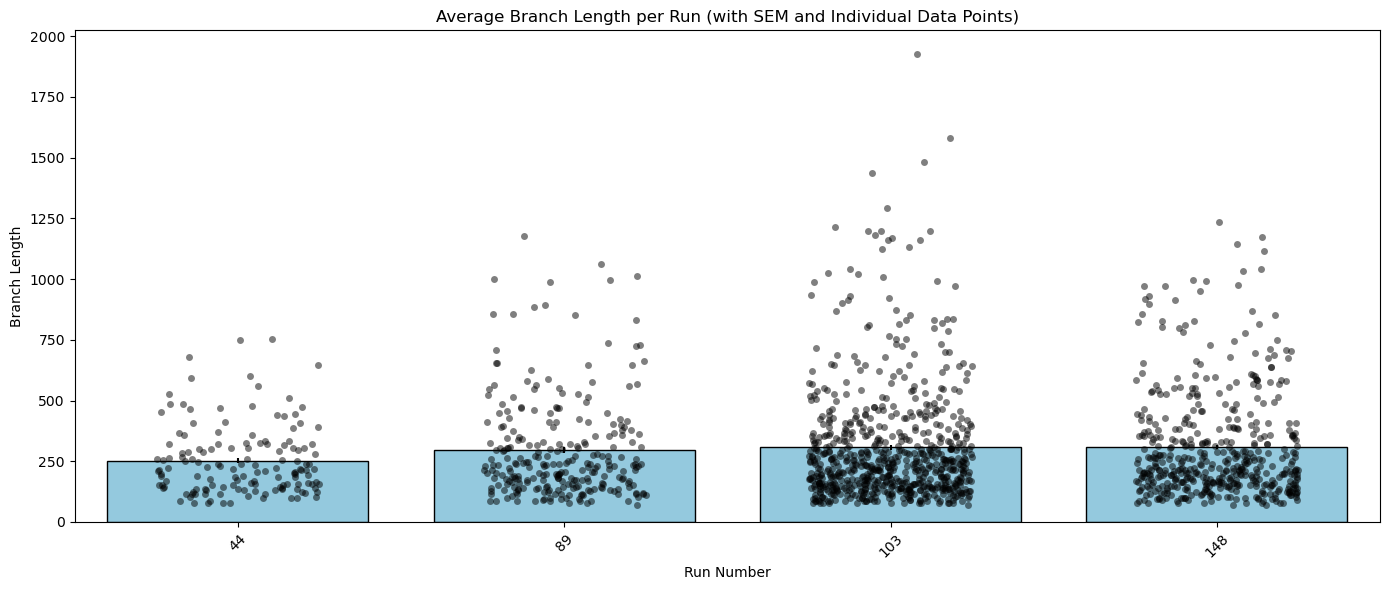

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Clean up non-numeric rows
results_df_cleaned = results_df[pd.to_numeric(results_df['value'], errors='coerce').notnull()].copy()
results_df_cleaned['value'] = results_df_cleaned['value'].astype(float)

# Step 2: Compute average and standard error per run
summary_df = results_df_cleaned.groupby('run_number').agg(
    mean_value=('value', 'mean'),
    stderr_value=('value', lambda x: x.std(ddof=1) / np.sqrt(len(x)))
).reset_index()

# Step 3: Set up the plot
plt.figure(figsize=(14, 6))

# Bar plot with error bars
sns.barplot(
    x='run_number', y='mean_value', data=summary_df,
    yerr=summary_df['stderr_value'], capsize=0.2,
    color='skyblue', edgecolor='black'
)

# Dot plot of individual points (with jitter)
sns.stripplot(
    x='run_number', y='value', data=results_df_cleaned,
    color='black', alpha=0.5, jitter=0.25
)

# Final touches
plt.xlabel('Run Number')
plt.ylabel('Branch Length')
plt.title('Average Branch Length per Run (with SEM and Individual Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Loading metadata...
Found 8 axon tracking runs
Loading detailed data...
Loaded data for 4 runs

Analyzing branchLen
Found 1590 data points for branchLen


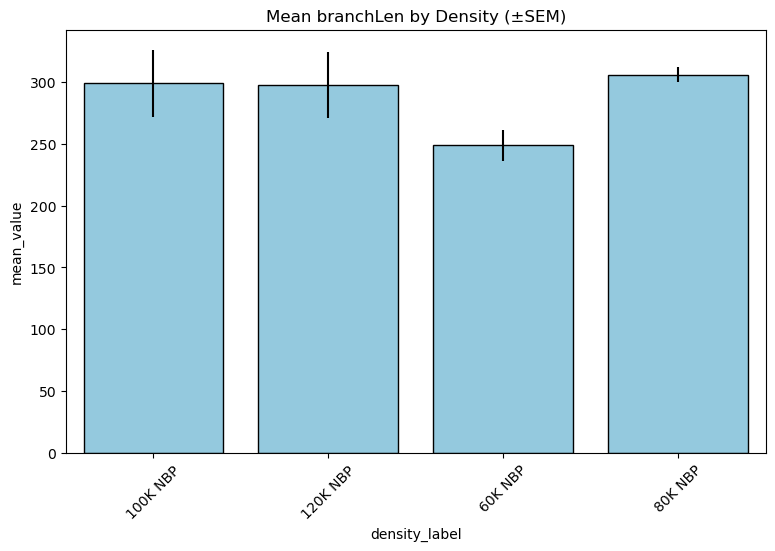


Summary Statistics for branchLen:
--------------------------------------------------
               count     mean      std   min     max
density_label                                       
100K NBP          61  298.690  210.974  77.2   992.9
120K NBP          75  297.436  233.405  70.0  1175.9
60K NBP          119  248.701  137.016  77.2   752.4
80K NBP         1331  305.666  226.271  70.0  1927.1

ANOVA Results for branchLen:
F-statistic: 2.4352
p-value: 0.0632

Analyzing neuronFiringRate
Found 2072 data points for neuronFiringRate


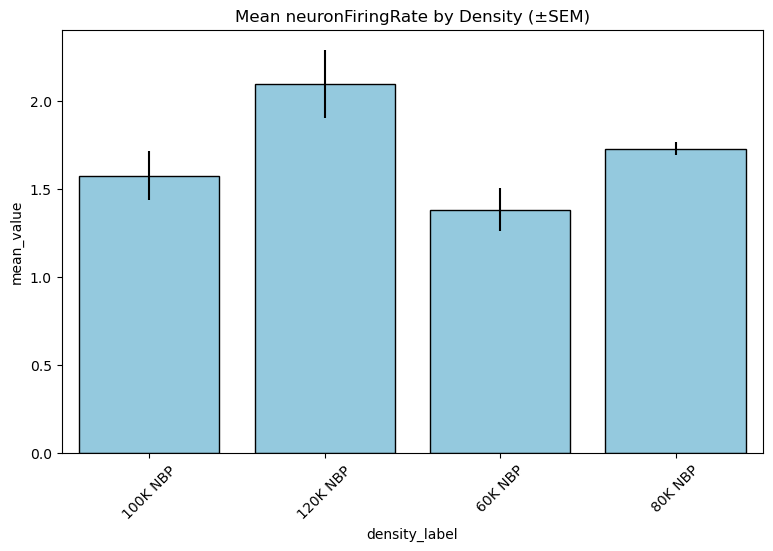


Summary Statistics for neuronFiringRate:
--------------------------------------------------
               count   mean    std   min   max
density_label                                 
100K NBP          81  1.578  1.244  0.11  4.21
120K NBP          97  2.098  1.907  0.12  4.60
60K NBP          227  1.384  1.845  0.11  9.35
80K NBP         1659  1.730  1.488  0.11  7.30

ANOVA Results for neuronFiringRate:
F-statistic: 5.6975
p-value: 0.0007
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0015 ***
60K NBP vs 100K NBP: p = 0.3812 
60K NBP vs 120K NBP: p = 0.0017 ***
80K NBP vs 100K NBP: p = 0.3655 
80K NBP vs 120K NBP: p = 0.0199 
100K NBP vs 120K NBP: p = 0.0363 

Analyzing branchConductionVel
Found 1590 data points for branchConductionVel


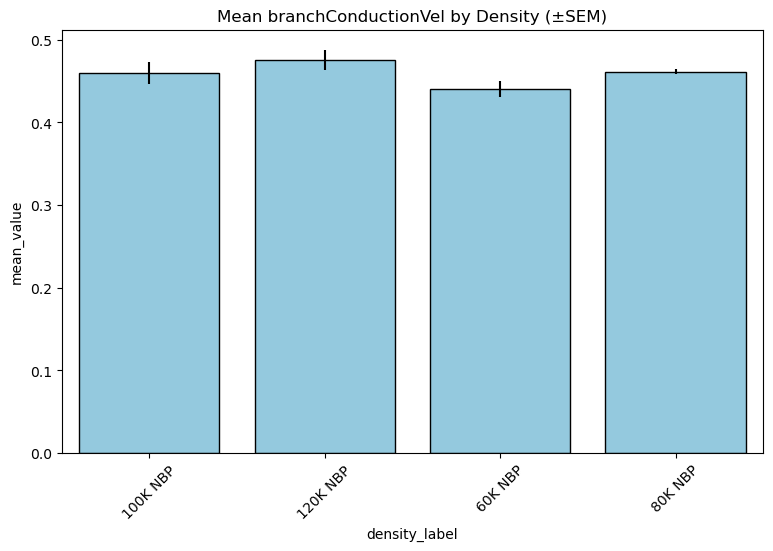


Summary Statistics for branchConductionVel:
--------------------------------------------------
               count   mean    std    min    max
density_label                                   
100K NBP          61  0.460  0.101  0.246  0.690
120K NBP          75  0.476  0.104  0.144  0.691
60K NBP          119  0.441  0.104  0.164  0.707
80K NBP         1331  0.461  0.109  0.153  0.818

ANOVA Results for branchConductionVel:
F-statistic: 1.8558
p-value: 0.1351

Analyzing totNoSpikes
Found 2072 data points for totNoSpikes


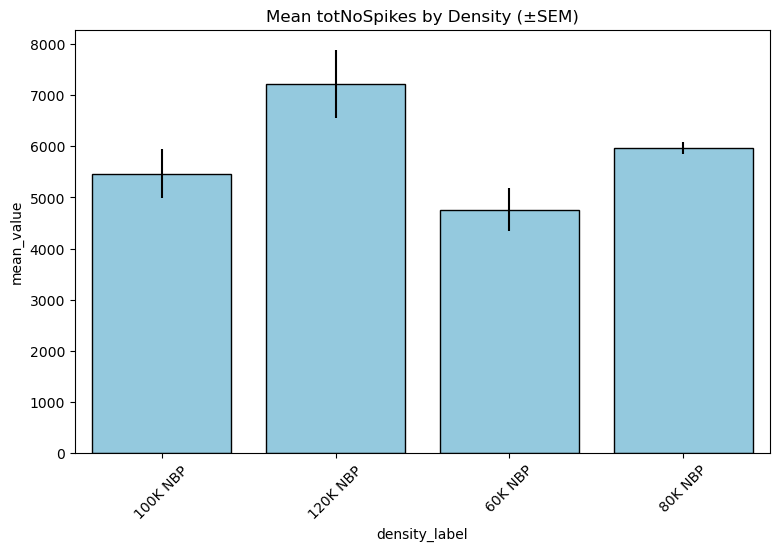


Summary Statistics for totNoSpikes:
--------------------------------------------------
               count      mean       std    min      max
density_label                                           
100K NBP          81  5459.864  4308.952  393.0  14496.0
120K NBP          97  7217.835  6565.460  402.0  15754.0
60K NBP          227  4759.943  6356.952  380.0  32218.0
80K NBP         1659  5966.802  5119.356  380.0  24974.0

ANOVA Results for totNoSpikes:
F-statistic: 5.7223
p-value: 0.0007
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0013 ***
60K NBP vs 100K NBP: p = 0.3593 
60K NBP vs 120K NBP: p = 0.0017 ***
80K NBP vs 100K NBP: p = 0.3811 
80K NBP vs 120K NBP: p = 0.0216 
100K NBP vs 120K NBP: p = 0.0403 


In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import re

# Step 1: Load and filter the metadata
def load_and_filter_metadata(file_path):
    """Load metadata and filter for Axon Tracking assays only"""
    metadata = pd.read_csv(file_path)  # Assuming tab-separated
    
    # Filter for Axon Tracking assays only
    axon_tracking_data = metadata[metadata['Assay'] == 'Axon Tracking'].copy()
    
    # Create a mapping of run number to density/media info
    run_density_map = {}
    
    for _, row in axon_tracking_data.iterrows():
        run_num = row['Run #']
        wells = str(row['Wells_Recorded']).split(',')
        sources = str(row['Neuron Source']).split(',')
        
        # Clean up wells and sources
        wells = [w.strip() for w in wells]
        sources = [s.strip() for s in sources]
        
        # Extract density and media info for each well
        well_info = {}
        for well, source in zip(wells, sources):
            # Parse density (e.g., "120K") and media (e.g., "NBP", "DMEM")
            density_match = re.search(r'(\d+)K', source)
            media_match = re.search(r'(NBP|DMEM)', source)
            
            if density_match and media_match:
                density = int(density_match.group(1))
                media = media_match.group(1)
                well_info[int(well)] = {'density': density, 'media': media, 'full_source': source}
        
        run_density_map[run_num] = {
            'date': row['Date'],
            'div': row['DIV'],
            'id': row['ID'],
            'wells': well_info
        }
    
    return run_density_map

# Step 2: Load detailed CSV data (your existing code)
def load_detailed_data(root_path):
    """Load all detailed CSV data from run folders"""
    data_dict = {}
    
    for run_folder in Path(root_path).iterdir():
        if run_folder.is_dir():
            run_number = int(run_folder.name.split("_")[-1])
            
            csv_folder = run_folder / "csv"
            if csv_folder.exists():
                run_data = {}
                for file in csv_folder.glob("*.csv"):
                    key_name = file.stem
                    try:
                        run_data[key_name] = pd.read_csv(file)
                    except Exception as e:
                        print(f"Error reading {file.name} in run {run_number}: {e}")
                data_dict[run_number] = run_data
    
    return data_dict

# Step 3: Enhanced search function that includes density information
def search_column_with_density(data_dict, run_density_map, column_name):
    """Search for column across runs and add density information"""
    results = []
    
    for run_num, file_dict in data_dict.items():
        if run_num not in run_density_map:
            print(f"Warning: Run {run_num} not found in density mapping")
            continue
            
        for file_name, df in file_dict.items():
            if column_name in df.columns:
                for idx, val in df[column_name].dropna().items():
                    # Try to get neuron number to map to well
                    neuron_num = None
                    if 'neuron' in df.columns:
                        neuron_num = df.loc[idx, 'neuron']
                    
                    # Map neuron to density (this might need adjustment based on your data structure)
                    density_info = None
                    wells_info = run_density_map[run_num]['wells']
                    
                    # If we have neuron number, try to map it to a well
                    if neuron_num is not None and neuron_num in wells_info:
                        density_info = wells_info[neuron_num]
                    elif len(wells_info) == 1:
                        # If only one well, use that
                        density_info = list(wells_info.values())[0]
                    else:
                        # Take the first well as default (you might want to adjust this)
                        density_info = list(wells_info.values())[0]
                    
                    if density_info:
                        results.append({
                            "run_number": run_num,
                            "file": file_name,
                            "value": val,
                            "density": density_info['density'],
                            "media": density_info['media'],
                            "neuron": neuron_num,
                            "date": run_density_map[run_num]['date'],
                            "div": run_density_map[run_num]['div']
                        })
    
    df = pd.DataFrame(results)
    if not df.empty:
        df = df.sort_values(by=['run_number', 'density']).reset_index(drop=True)
    return df

# Step 4: Plotting functions
def plot_density_comparison(df, metric_name, plot_type='both'):
    """Create plots comparing densities for a given metric"""
    # Clean up non-numeric values
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    
    if df_clean.empty:
        print(f"No valid data found for {metric_name}")
        return
    
    # Create density labels
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    plt.figure(figsize=(15, 10))
    
    if plot_type in ['both', 'bar']:
        plt.subplot(2, 2, 3)
        summary_df = df_clean.groupby('density_label').agg(
            mean_value=('value', 'mean'),
            stderr_value=('value', lambda x: x.std(ddof=1) / np.sqrt(len(x)) if len(x) > 1 else 0)
        ).reset_index()
        
        # Drop rows with NaN or invalid values
        summary_df = summary_df.dropna(subset=['mean_value', 'stderr_value'])
        
        # Ensure yerr matches y in shape
        yerr = summary_df['stderr_value'].values
        if len(yerr) != len(summary_df['mean_value']):
            print("Warning: yerr and y values do not match in shape. Skipping error bars.")
            yerr = None
        
        sns.barplot(data=summary_df, x='density_label', y='mean_value', 
                    yerr=yerr, capsize=0.2, color='skyblue', edgecolor='black')
        plt.title(f'Mean {metric_name} by Density (±SEM)')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary Statistics for {metric_name}:")
    print("-" * 50)
    summary_stats = df_clean.groupby('density_label')['value'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(3)
    print(summary_stats)

# Step 5: Statistical analysis
def statistical_analysis(df, metric_name):
    """Perform statistical analysis comparing densities"""
    from scipy import stats
    
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    # Order density labels from least to greatest
    density_order = df_clean.groupby('density_label')['density'].first().sort_values().index.tolist()
    df_clean['density_label'] = pd.Categorical(df_clean['density_label'], categories=density_order, ordered=True)
    
    # Group data by density (in order)
    groups = []
    group_names = []
    for density in density_order:
        group_data = df_clean[df_clean['density_label'] == density]['value'].values
        if len(group_data) > 0:
            groups.append(group_data)
            group_names.append(density)
    
    if len(groups) > 2:
        # ANOVA for multiple groups
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Results for {metric_name}:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("Significant difference found between groups!")
            
            # Post-hoc pairwise comparisons
            print("\nPairwise t-tests (Bonferroni corrected):")
            n_comparisons = len(groups) * (len(groups) - 1) // 2
            alpha_corrected = 0.05 / n_comparisons
            
            for i in range(len(groups)):
                for j in range(i+1, len(groups)):
                    t_stat, p_val = stats.ttest_ind(groups[i], groups[j])
                    significant = "***" if p_val < alpha_corrected else ""
                    print(f"{group_names[i]} vs {group_names[j]}: p = {p_val:.4f} {significant}")
    
    elif len(groups) == 2:
        # t-test for two groups
        t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
        print(f"\nt-test Results for {metric_name}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Example usage:
# Replace these paths with your actual file paths
metadata_file_path = "/Users/shrutishah/Downloads/RoyBen-ShalomLab/shruti_axontracking_analysis_detailedcsvs/MaxTwo_MEA Tracking Sheets_Sep2024 onwards_AR(AutoRecovered)(Media Density Exp_T3_070120).csv"  # The tab-separated file you pasted
detailed_data_path = "/Users/shrutishah/Downloads/RoyBen-ShalomLab/shruti_axontracking_analysis_detailedcsvs"

# Load data
print("Loading metadata...")
run_density_map = load_and_filter_metadata(metadata_file_path)
print(f"Found {len(run_density_map)} axon tracking runs")

print("Loading detailed data...")
data_dict = load_detailed_data(detailed_data_path)
print(f"Loaded data for {len(data_dict)} runs")

# Analyze different metrics
metrics_to_analyze = ['branchLen', 'neuronFiringRate', 'branchConductionVel', 'totNoSpikes']

for metric in metrics_to_analyze:
    print(f"\n{'='*60}")
    print(f"Analyzing {metric}")
    print('='*60)
    
    # Get data with density information
    results_df = search_column_with_density(data_dict, run_density_map, metric)
    
    if not results_df.empty:
        print(f"Found {len(results_df)} data points for {metric}")
        
        # Create plots
        plot_density_comparison(results_df, metric)
        
        # Statistical analysis
        statistical_analysis(results_df, metric)
    else:
        print(f"No data found for {metric}")

# Function to explore available metrics
def explore_available_metrics(data_dict):
    """Find all available column names across all files"""
    all_columns = set()
    for run_num, file_dict in data_dict.items():
        for file_name, df in file_dict.items():
            all_columns.update(df.columns)
    
    print("Available metrics to analyze:")
    for col in sorted(all_columns):
        print(f"  - {col}")
    
    return sorted(all_columns)

# Uncomment to see all available metrics:
# available_metrics = explore_available_metrics(data_dict)

Loading metadata...
Found 8 axon tracking runs
Axon tracking runs found:
  Run 44: 6 wells
    Well 1: 60K NBP
    Well 2: 80K NBP
    Well 3: 100K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
    Well 6: 120K NBP
  Run 89: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 103: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 148: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 173: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 174: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 192: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 225: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP

Loading detailed data...
Loaded data for 4 runs
Runs with detailed data: [44, 89, 103, 148]

Runs with both metadata and detailed data: [44, 89, 103, 148]

Available metrics to analyze:
  - Plating Date
  - Unnamed: 0


/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


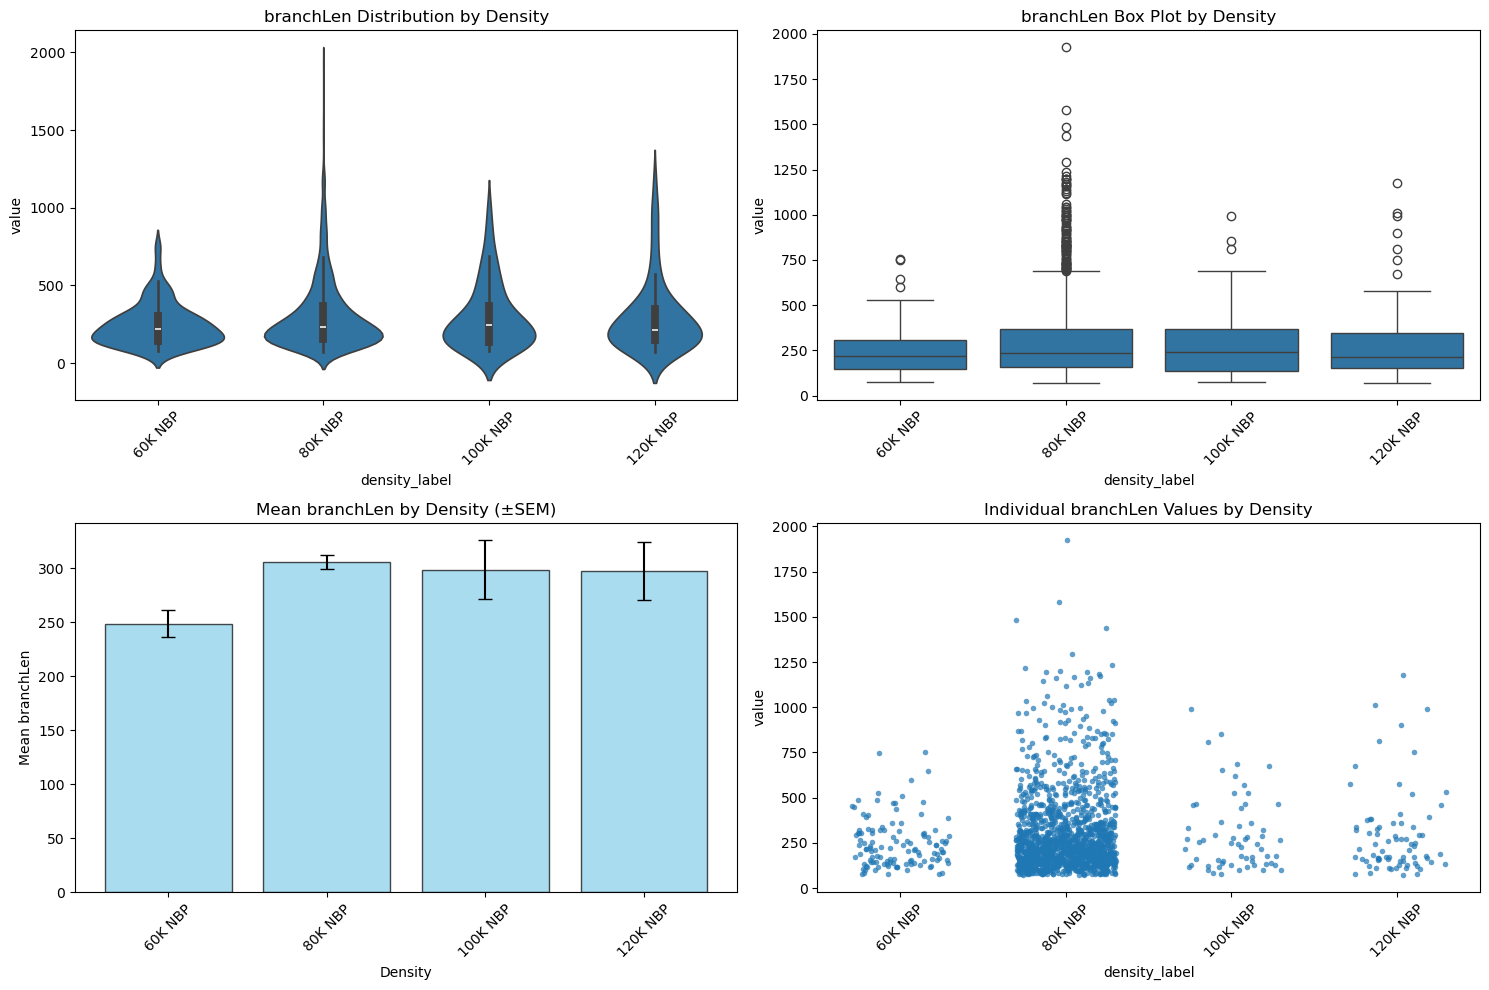


Summary Statistics for branchLen:
--------------------------------------------------
               count     mean      std   min     max
density_label                                       
60K NBP          119  248.701  137.016  77.2   752.4
80K NBP         1331  305.666  226.271  70.0  1927.1
100K NBP          61  298.690  210.974  77.2   992.9
120K NBP          75  297.436  233.405  70.0  1175.9

ANOVA Results for branchLen:
F-statistic: 2.4352
p-value: 0.0632
No significant differences found between groups.

Analyzing neuronFiringRate
Found 2072 data points for neuronFiringRate
Density combinations found:
  60K NBP: 229 data points
  80K NBP: 1665 data points
  100K NBP: 81 data points
  120K NBP: 97 data points


/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([
/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


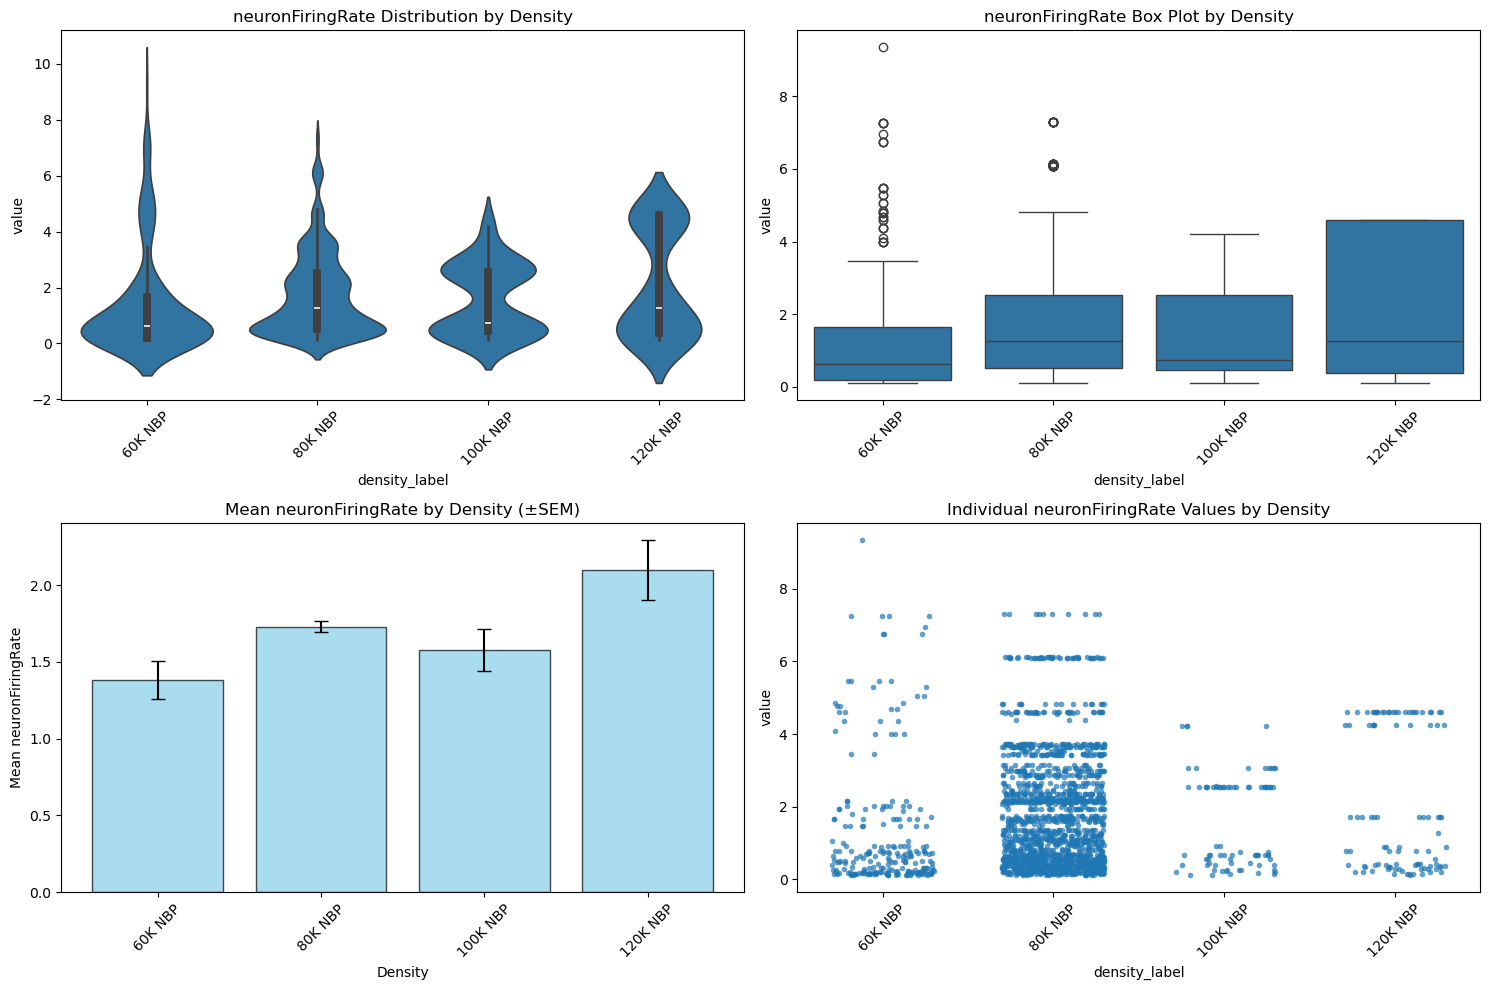


Summary Statistics for neuronFiringRate:
--------------------------------------------------
               count   mean    std   min   max
density_label                                 
60K NBP          227  1.384  1.845  0.11  9.35
80K NBP         1659  1.730  1.488  0.11  7.30
100K NBP          81  1.578  1.244  0.11  4.21
120K NBP          97  2.098  1.907  0.12  4.60

ANOVA Results for neuronFiringRate:
F-statistic: 5.6975
p-value: 0.0007
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0015 ***
60K NBP vs 100K NBP: p = 0.3812 
60K NBP vs 120K NBP: p = 0.0017 ***
80K NBP vs 100K NBP: p = 0.3655 
80K NBP vs 120K NBP: p = 0.0199 
100K NBP vs 120K NBP: p = 0.0363 

Analyzing branchConductionVel
Found 1590 data points for branchConductionVel
Density combinations found:
  60K NBP: 120 data points
  80K NBP: 1334 data points
  100K NBP: 61 data points
  120K NBP: 75 data points


/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([
/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


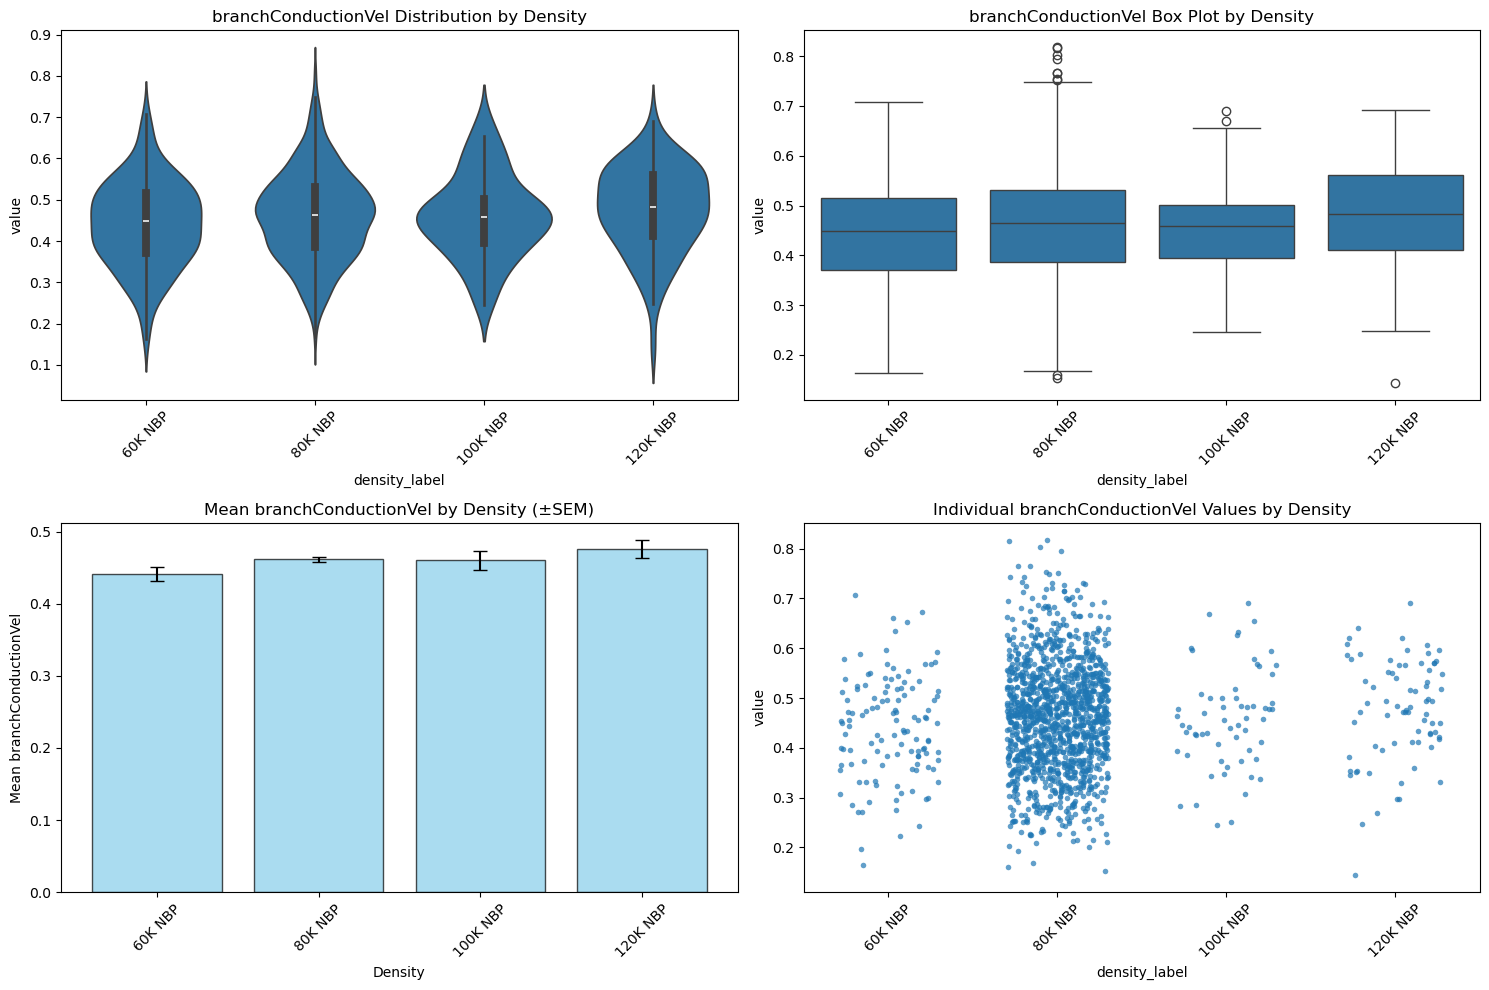


Summary Statistics for branchConductionVel:
--------------------------------------------------
               count   mean    std    min    max
density_label                                   
60K NBP          119  0.441  0.104  0.164  0.707
80K NBP         1331  0.461  0.109  0.153  0.818
100K NBP          61  0.460  0.101  0.246  0.690
120K NBP          75  0.476  0.104  0.144  0.691

ANOVA Results for branchConductionVel:
F-statistic: 1.8558
p-value: 0.1351
No significant differences found between groups.

Analyzing totNoSpikes
Found 2072 data points for totNoSpikes
Density combinations found:
  60K NBP: 229 data points
  80K NBP: 1665 data points
  100K NBP: 81 data points
  120K NBP: 97 data points


/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([
/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


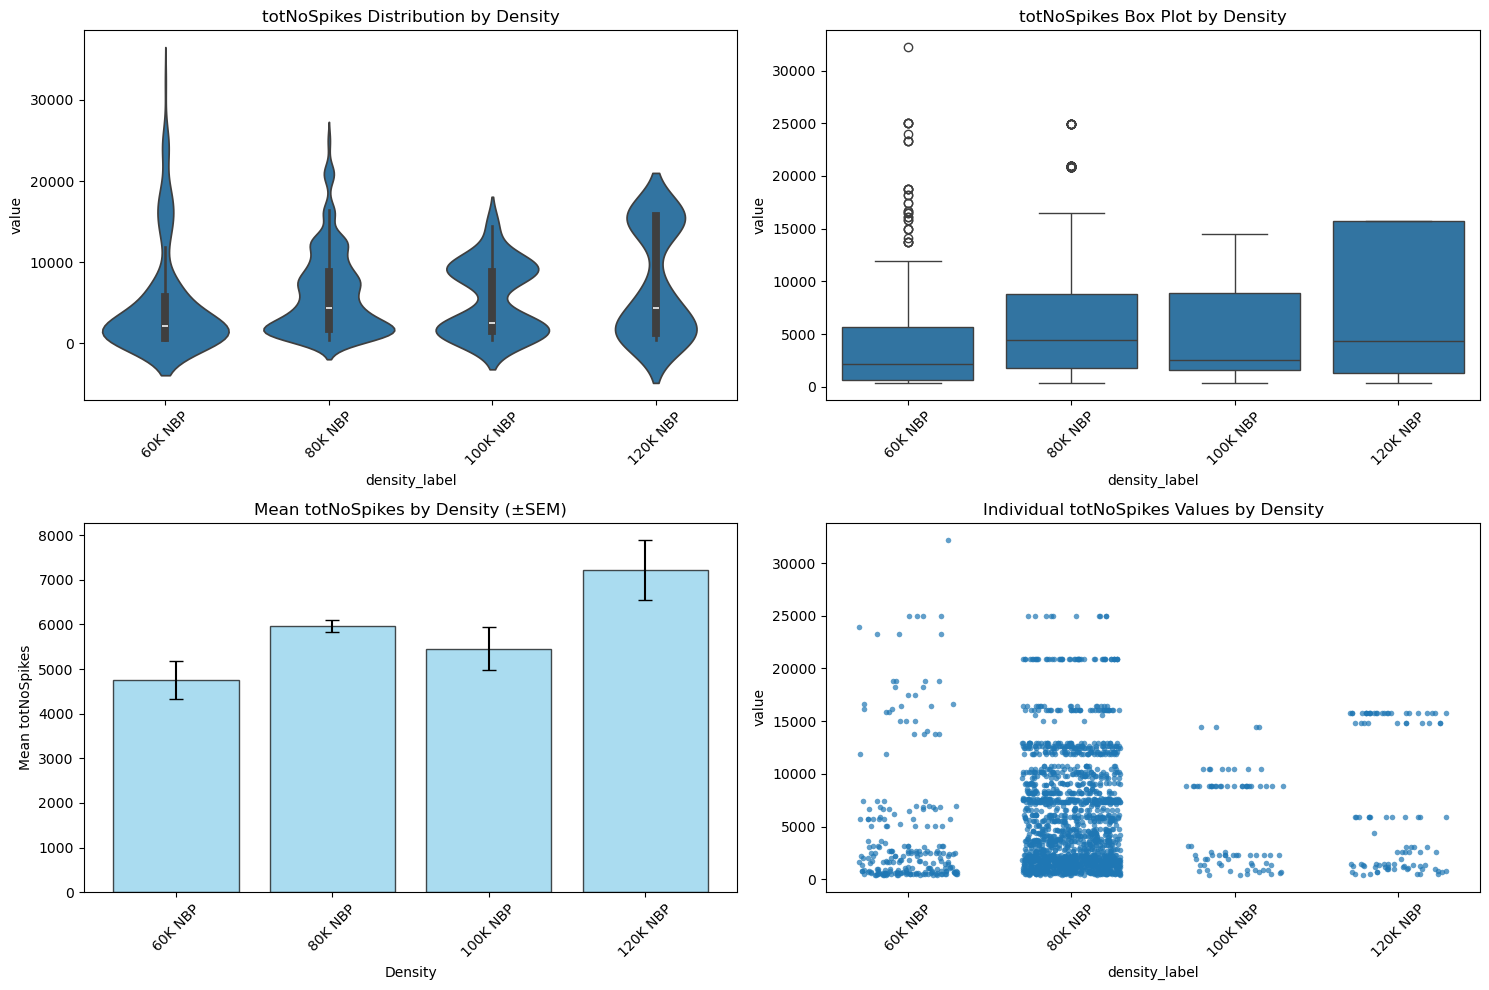


Summary Statistics for totNoSpikes:
--------------------------------------------------
               count      mean       std    min      max
density_label                                           
60K NBP          227  4759.943  6356.952  380.0  32218.0
80K NBP         1659  5966.802  5119.356  380.0  24974.0
100K NBP          81  5459.864  4308.952  393.0  14496.0
120K NBP          97  7217.835  6565.460  402.0  15754.0

ANOVA Results for totNoSpikes:
F-statistic: 5.7223
p-value: 0.0007
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0013 ***
60K NBP vs 100K NBP: p = 0.3593 
60K NBP vs 120K NBP: p = 0.0017 ***
80K NBP vs 100K NBP: p = 0.3811 
80K NBP vs 120K NBP: p = 0.0216 
100K NBP vs 120K NBP: p = 0.0403 


/var/folders/fb/jry5kd4d3g1b1y4h2pk62qh40000gn/T/ipykernel_24764/1843856413.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import re

# Step 1: Load and filter the metadata
def load_and_filter_metadata(file_path):
    """Load metadata and filter for Axon Tracking assays only"""
    metadata = pd.read_csv(file_path)  # Regular CSV format
    
    # Filter for Axon Tracking assays only
    axon_tracking_data = metadata[metadata['Assay'] == 'Axon Tracking'].copy()
    
    # Create a mapping of run number to density/media info
    run_density_map = {}
    
    for _, row in axon_tracking_data.iterrows():
        run_num = row['Run #']
        wells = str(row['Wells_Recorded']).split(',')
        sources = str(row['Neuron Source']).split(',')
        
        # Clean up wells and sources
        wells = [w.strip() for w in wells]
        sources = [s.strip() for s in sources]
        
        # Extract density and media info for each well
        well_info = {}
        for well, source in zip(wells, sources):
            # Parse density (e.g., "120K") and media (e.g., "NBP", "DMEM")
            density_match = re.search(r'(\d+)K', source)
            media_match = re.search(r'(NBP|DMEM)', source)
            
            if density_match and media_match:
                density = int(density_match.group(1))
                media = media_match.group(1)
                well_info[int(well)] = {'density': density, 'media': media, 'full_source': source}
        
        run_density_map[run_num] = {
            'date': row['Date'],
            'div': row['DIV'],
            'id': row['ID'],
            'wells': well_info
        }
    
    return run_density_map

# Step 2: Load detailed CSV data (your existing code)
def load_detailed_data(root_path):
    """Load all detailed CSV data from run folders"""
    data_dict = {}
    
    for run_folder in Path(root_path).iterdir():
        if run_folder.is_dir():
            run_number = int(run_folder.name.split("_")[-1])
            
            csv_folder = run_folder / "csv"
            if csv_folder.exists():
                run_data = {}
                for file in csv_folder.glob("*.csv"):
                    key_name = file.stem
                    try:
                        run_data[key_name] = pd.read_csv(file)
                    except Exception as e:
                        print(f"Error reading {file.name} in run {run_number}: {e}")
                data_dict[run_number] = run_data
    
    return data_dict

# Step 3: Enhanced search function that includes density information
def search_column_with_density(data_dict, run_density_map, column_name):
    """Search for column across runs and add density information"""
    results = []
    
    for run_num, file_dict in data_dict.items():
        if run_num not in run_density_map:
            print(f"Warning: Run {run_num} not found in density mapping")
            continue
            
        for file_name, df in file_dict.items():
            if column_name in df.columns:
                for idx, val in df[column_name].dropna().items():
                    # Try to get neuron number to map to well
                    neuron_num = None
                    if 'neuron' in df.columns:
                        neuron_num = df.loc[idx, 'neuron']
                    
                    # Map neuron to density (this might need adjustment based on your data structure)
                    density_info = None
                    wells_info = run_density_map[run_num]['wells']
                    
                    # If we have neuron number, try to map it to a well
                    if neuron_num is not None and neuron_num in wells_info:
                        density_info = wells_info[neuron_num]
                    elif len(wells_info) == 1:
                        # If only one well, use that
                        density_info = list(wells_info.values())[0]
                    else:
                        # Take the first well as default (you might want to adjust this)
                        density_info = list(wells_info.values())[0]
                    
                    if density_info:
                        results.append({
                            "run_number": run_num,
                            "file": file_name,
                            "value": val,
                            "density": density_info['density'],
                            "media": density_info['media'],
                            "neuron": neuron_num,
                            "date": run_density_map[run_num]['date'],
                            "div": run_density_map[run_num]['div']
                        })
    
    df = pd.DataFrame(results)
    if not df.empty:
        df = df.sort_values(by=['run_number', 'density']).reset_index(drop=True)
    return df

# Step 4: Plotting functions
def plot_density_comparison(df, metric_name, plot_type='both'):
    """Create plots comparing densities for a given metric"""
    # Clean up non-numeric values
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    
    if df_clean.empty:
        print(f"No valid data found for {metric_name}")
        return
    
    # Create density labels and order them from least to greatest
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    # Create ordered categories based on density (numerical) then media (alphabetical)
    density_order = df_clean.groupby('density_label')['density'].first().sort_values().index.tolist()
    df_clean['density_label'] = pd.Categorical(df_clean['density_label'], categories=density_order, ordered=True)
    
    plt.figure(figsize=(15, 10))
    
    if plot_type in ['both', 'violin']:
        plt.subplot(2, 2, 1)
        sns.violinplot(data=df_clean, x='density_label', y='value', order=density_order)
        plt.title(f'{metric_name} Distribution by Density')
        plt.xticks(rotation=45)
    
    if plot_type in ['both', 'box']:
        plt.subplot(2, 2, 2)
        sns.boxplot(data=df_clean, x='density_label', y='value', order=density_order)
        plt.title(f'{metric_name} Box Plot by Density')
        plt.xticks(rotation=45)
    
    if plot_type in ['both', 'bar']:
        plt.subplot(2, 2, 3)
        summary_df = df_clean.groupby('density_label').agg(
            mean_value=('value', 'mean'),
            stderr_value=('value', lambda x: x.std(ddof=1) / np.sqrt(len(x)) if len(x) > 1 else 0)
        ).reset_index()
        
        # Reorder summary_df according to density_order
        summary_df['density_label'] = pd.Categorical(summary_df['density_label'], categories=density_order, ordered=True)
        summary_df = summary_df.sort_values('density_label').reset_index(drop=True)
        
        # Create bar plot
        bars = plt.bar(range(len(summary_df)), summary_df['mean_value'], 
                      yerr=summary_df['stderr_value'], capsize=5,
                      color='skyblue', edgecolor='black', alpha=0.7)
        
        plt.xlabel('Density')
        plt.ylabel(f'Mean {metric_name}')
        plt.title(f'Mean {metric_name} by Density (±SEM)')
        plt.xticks(range(len(summary_df)), summary_df['density_label'], rotation=45)
    
    if plot_type in ['both', 'strip']:
        plt.subplot(2, 2, 4)
        sns.stripplot(data=df_clean, x='density_label', y='value', 
                     alpha=0.7, jitter=0.3, size=4, order=density_order)
        plt.title(f'Individual {metric_name} Values by Density')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics (ordered)
    print(f"\nSummary Statistics for {metric_name}:")
    print("-" * 50)
    summary_stats = df_clean.groupby('density_label')['value'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(3)
    # Reorder by density
    summary_stats = summary_stats.reindex(density_order)
    print(summary_stats)

# Step 5: Statistical analysis
def statistical_analysis(df, metric_name):
    """Perform statistical analysis comparing densities"""
    try:
        from scipy import stats
    except ImportError:
        print("scipy not available. Skipping statistical analysis.")
        return
    
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    # Order density labels from least to greatest
    density_order = df_clean.groupby('density_label')['density'].first().sort_values().index.tolist()
    df_clean['density_label'] = pd.Categorical(df_clean['density_label'], categories=density_order, ordered=True)
    
    # Group data by density (in order)
    groups = []
    group_names = []
    for density in density_order:
        group_data = df_clean[df_clean['density_label'] == density]['value'].values
        if len(group_data) > 0:
            groups.append(group_data)
            group_names.append(density)
    
    if len(groups) > 2:
        # ANOVA for multiple groups
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Results for {metric_name}:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("Significant difference found between groups!")
            
            # Post-hoc pairwise comparisons
            print("\nPairwise t-tests (Bonferroni corrected):")
            n_comparisons = len(groups) * (len(groups) - 1) // 2
            alpha_corrected = 0.05 / n_comparisons
            
            for i in range(len(groups)):
                for j in range(i+1, len(groups)):
                    t_stat, p_val = stats.ttest_ind(groups[i], groups[j])
                    significant = "***" if p_val < alpha_corrected else ""
                    print(f"{group_names[i]} vs {group_names[j]}: p = {p_val:.4f} {significant}")
        else:
            print("No significant differences found between groups.")
    
    elif len(groups) == 2:
        # t-test for two groups
        t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
        print(f"\nt-test Results for {metric_name}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
    else:
        print(f"Not enough groups for statistical comparison (found {len(groups)} groups)")

# Function to explore available metrics
def explore_available_metrics(data_dict):
    """Find all available column names across all files"""
    all_columns = set()
    for run_num, file_dict in data_dict.items():
        for file_name, df in file_dict.items():
            all_columns.update(df.columns)
    
    print("Available metrics to analyze:")
    for col in sorted(all_columns):
        print(f"  - {col}")
    
    return sorted(all_columns)

# Main execution
if __name__ == "__main__":
    # Replace these paths with your actual file paths
    metadata_file_path = "/Users/shrutishah/Downloads/RoyBen-ShalomLab/shruti_axontracking_analysis_detailedcsvs/MaxTwo_MEA Tracking Sheets_Sep2024 onwards_AR(AutoRecovered)(Media Density Exp_T3_070120).csv"
    detailed_data_path = "/Users/shrutishah/Downloads/RoyBen-ShalomLab/shruti_axontracking_analysis_detailedcsvs"

    # Load data
    print("Loading metadata...")
    try:
        run_density_map = load_and_filter_metadata(metadata_file_path)
        print(f"Found {len(run_density_map)} axon tracking runs")
        
        # Print the runs found for debugging
        print("Axon tracking runs found:")
        for run_num, info in run_density_map.items():
            print(f"  Run {run_num}: {len(info['wells'])} wells")
            for well, well_info in info['wells'].items():
                print(f"    Well {well}: {well_info['density']}K {well_info['media']}")
    
    except Exception as e:
        print(f"Error loading metadata: {e}")
        run_density_map = {}

    print("\nLoading detailed data...")
    try:
        data_dict = load_detailed_data(detailed_data_path)
        print(f"Loaded data for {len(data_dict)} runs")
        
        # Print which runs have data
        print("Runs with detailed data:", sorted(data_dict.keys()))
        
    except Exception as e:
        print(f"Error loading detailed data: {e}")
        data_dict = {}

    # Check for overlap between metadata and detailed data
    if run_density_map and data_dict:
        metadata_runs = set(run_density_map.keys())
        detailed_runs = set(data_dict.keys())
        overlap = metadata_runs.intersection(detailed_runs)
        print(f"\nRuns with both metadata and detailed data: {sorted(overlap)}")
        
        if not overlap:
            print("WARNING: No overlap between metadata runs and detailed data runs!")
            print(f"Metadata runs: {sorted(metadata_runs)}")
            print(f"Detailed data runs: {sorted(detailed_runs)}")

    # Uncomment to see all available metrics:
    if data_dict:
        print("\n" + "="*60)
        available_metrics = explore_available_metrics(data_dict)
        print("="*60)

    # Analyze different metrics
    metrics_to_analyze = ['branchLen', 'neuronFiringRate', 'branchConductionVel', 'totNoSpikes']

    for metric in metrics_to_analyze:
        print(f"\n{'='*60}")
        print(f"Analyzing {metric}")
        print('='*60)
        
        # Get data with density information
        results_df = search_column_with_density(data_dict, run_density_map, metric)
        
        if not results_df.empty:
            print(f"Found {len(results_df)} data points for {metric}")
            
            # Print unique density combinations found
            unique_densities = results_df.groupby(['density', 'media']).size().reset_index(name='count')
            print("Density combinations found:")
            for _, row in unique_densities.iterrows():
                print(f"  {row['density']}K {row['media']}: {row['count']} data points")
            
            # Create plots
            plot_density_comparison(results_df, metric)
            
            # Statistical analysis
            statistical_analysis(results_df, metric)
        else:
            print(f"No data found for {metric}")
            
            # Debug: check if column exists anywhere
            found_in_files = []
            for run_num, file_dict in data_dict.items():
                for file_name, df in file_dict.items():
                    if metric in df.columns:
                        found_in_files.append(f"Run {run_num}, file {file_name}")
            
            if found_in_files:
                print(f"  But {metric} was found in: {found_in_files}")
            else:
                print(f"  {metric} not found in any files.")